

Task6 - PREDICTION USING DECISION TREE ALGORITHM
---
The Sparks Foundation - GRIP NOVEMBER 2023
---
# -- AUTHOR: RISHABH ARORA



In [9]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
print('Libraries imported')

Libraries imported


In [16]:
data = pd.read_csv('/content/Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [19]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [20]:
#BASIC STATISTICS ABOUT DATASET
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


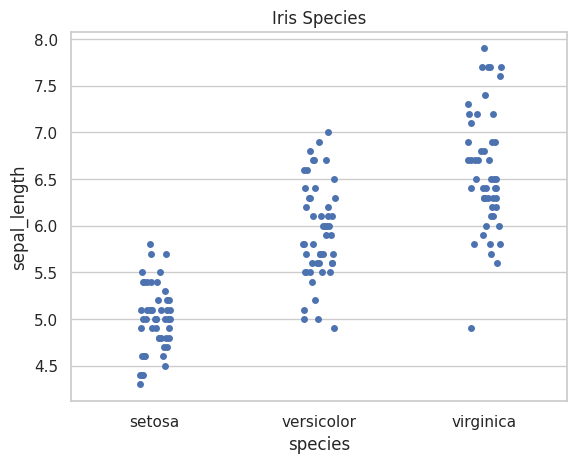

In [24]:
#VISUALISING THE SPECIES
sns.set(style='whitegrid')
iris = sns.load_dataset('iris')
ax = sns.stripplot(x='species',y='sepal_length',data=iris)
plt.title('Iris Species')
plt.show()

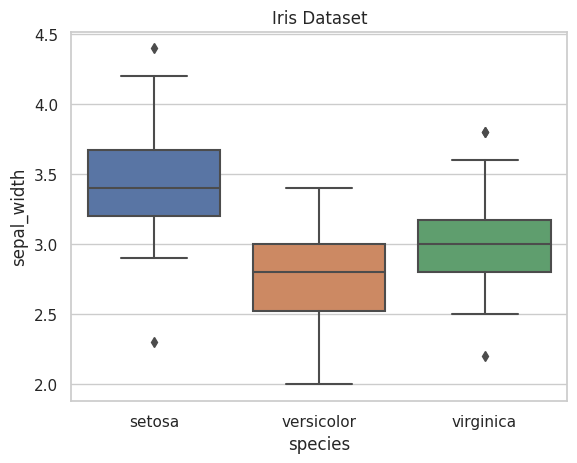

In [25]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

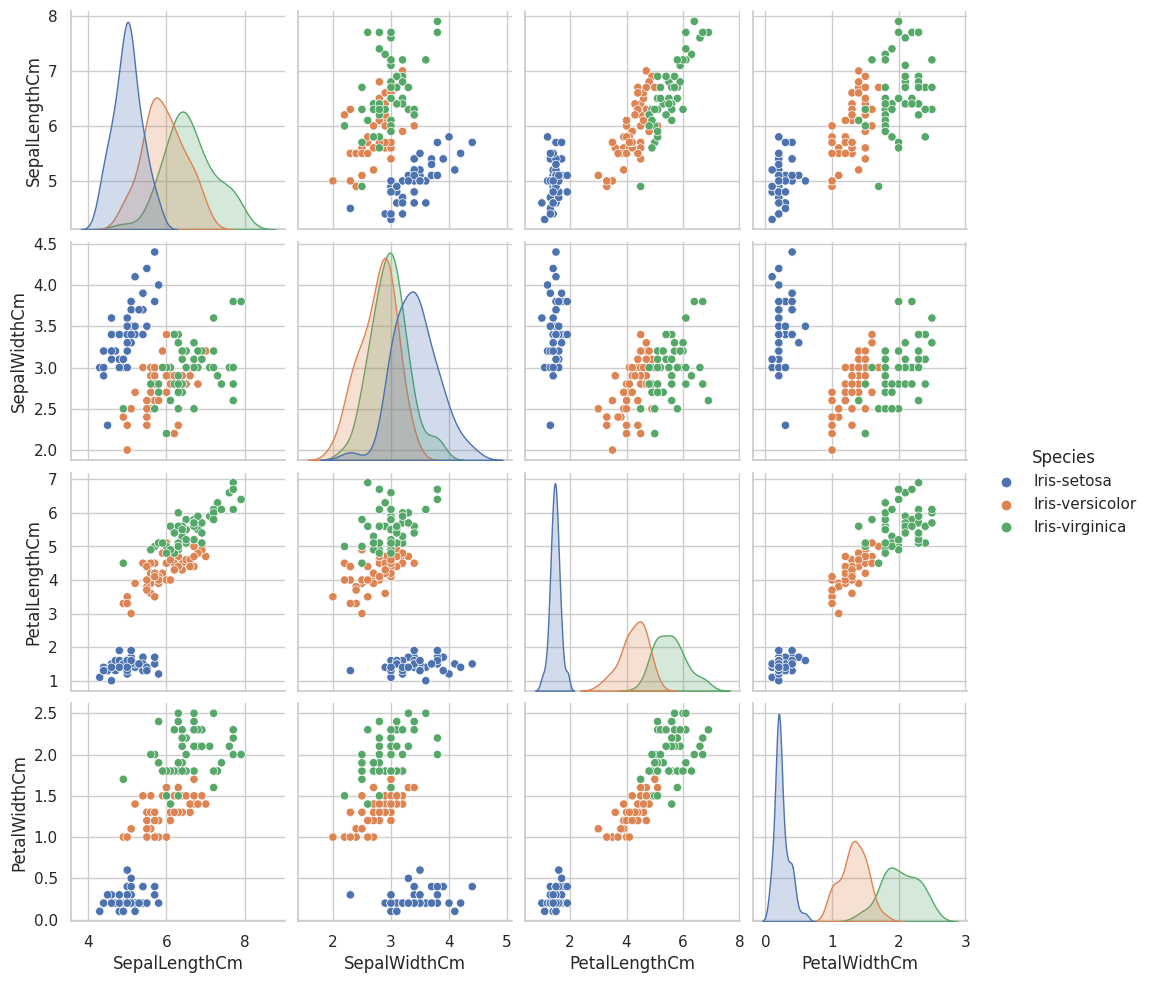

In [27]:
sns.pairplot(data,hue='Species')

In [28]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-30-6448fe6a8dcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_1 = data.corr()


<Axes: >

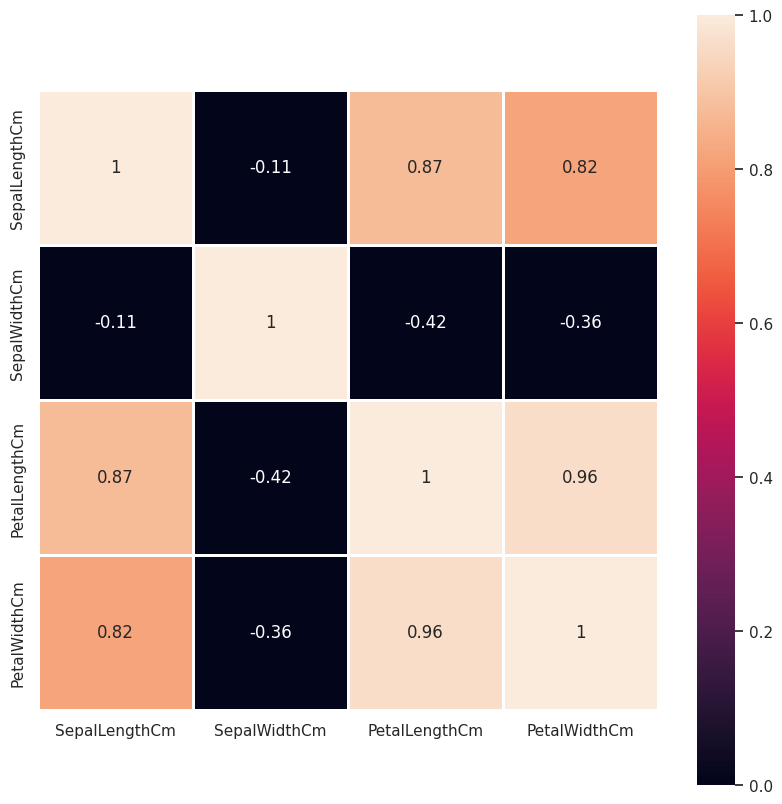

In [30]:
iris_1 = data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris_1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

<ipython-input-31-2dffa24ebb8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth=1,cmap='magma')


<Axes: >

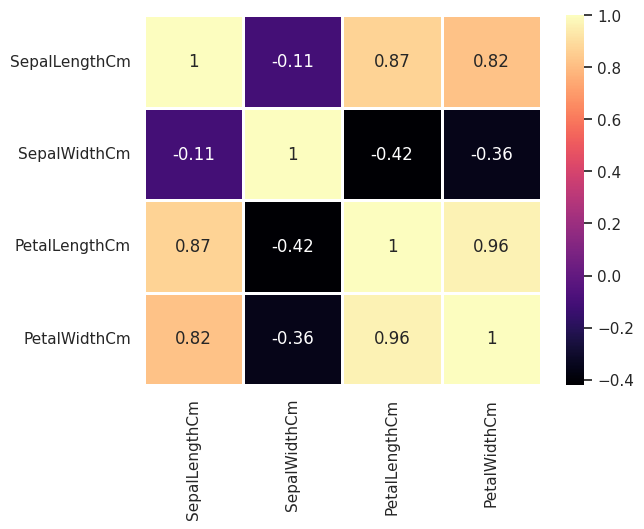

In [31]:
sns.heatmap(data.corr(),annot=True,linewidth=1,cmap='magma')

In [32]:
target=data['SepalLengthCm']
df=data.copy()
df = df.drop('Species',axis=1)
df.shape

(150, 4)

In [59]:
#ATTRIBUTE AND LABELS
x=data.iloc[:,[0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

In [60]:
#TRAIN TEST AND SPLIT
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('TRAINING SPLIT-',x_train.shape)
print('TESTING SPLIT-',x_test.shape)

TRAINING SPLIT- (120, 4)
TESTING SPLIT- (30, 4)


In [61]:
#MODEL FITTING
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print('MODEL FITTED')

MODEL FITTED


In [62]:
y_pred =dtree.predict(x_test)
print('DECISION TREE CLASSIFICATION REPORT:\n',classification_report(y_test,y_pred))

DECISION TREE CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [63]:
acc=sm.accuracy_score(y_test,y_pred)
print('DECISION TREE MODEL ACCURACY SCORE: {0}%'.format(acc*100))

DECISION TREE MODEL ACCURACY SCORE: 96.66666666666667%


In [64]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

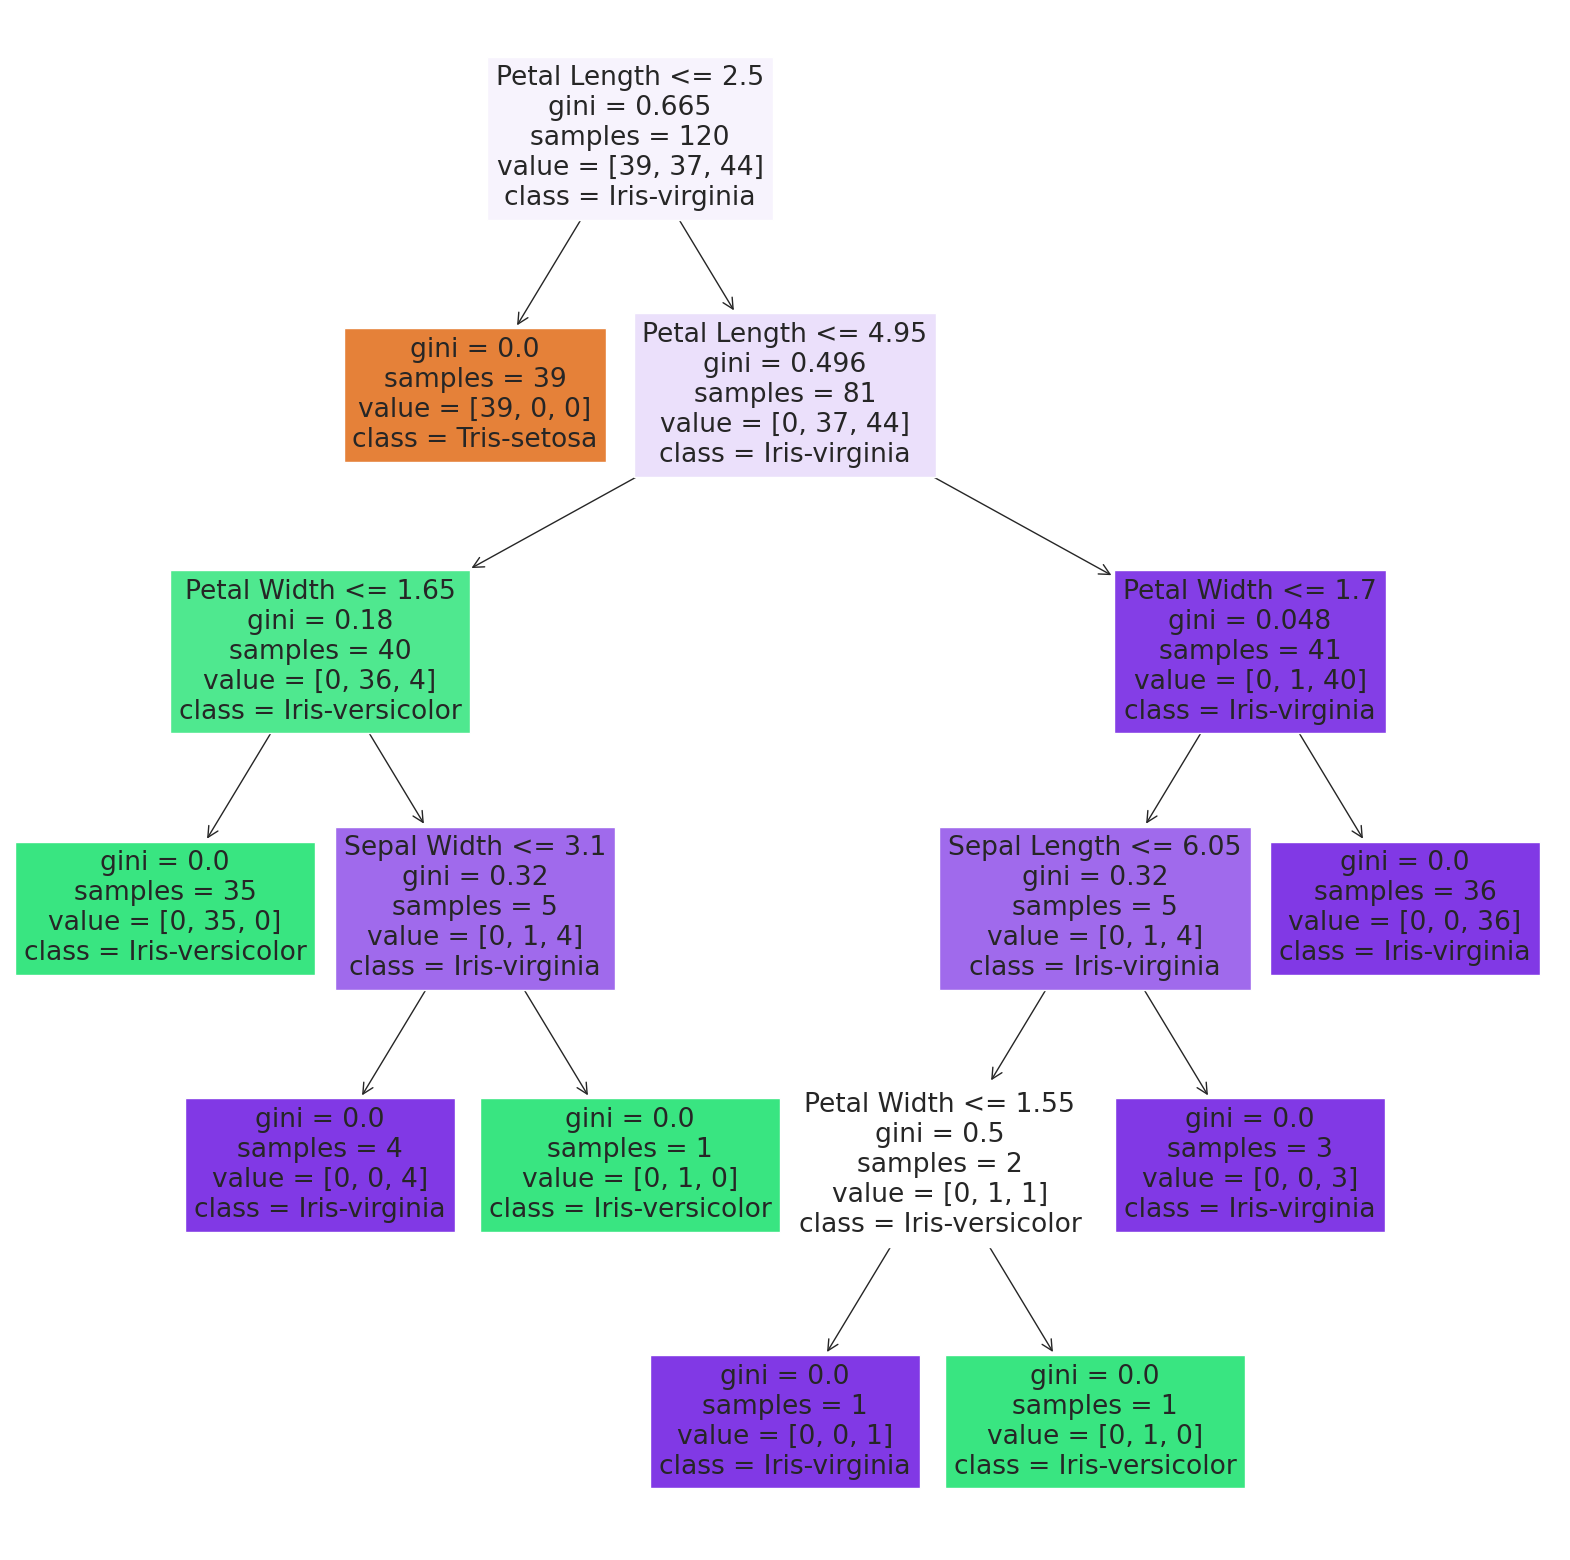

In [65]:
#PLOTTING THE DECISION TREE
plt.figure(figsize=(20,20))

feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name = ['Tris-setosa','Iris-versicolor','Iris-virginia']
plot_tree(dtree,filled=True,class_names=class_name,feature_names=feature)
plt.show()